## SI 670 Applied Machine Learning, Week 4:  Multi-class Classification, SVM, Data Leakage.

In [1]:
# # run this cell if you are using Colab

# !rm -rf fruit_data_with_colors.txt
# !rm -rf adspy_shared_utilities.py

# import io

# from google.colab import files as colab_files
# uploaded = colab_files.upload()
# files = {'fruit_data_with_colors.txt': io.BytesIO(uploaded['fruit_data_with_colors.txt'])}

# # upload 'fruit_data_with_colors.txt' and 'adspy_shared_utilities.py'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# run this cell if you are using Jupyter
files = {'fruit_data_with_colors.txt': 'fruit_data_with_colors.txt'}

In [4]:
%matplotlib inline
import operator
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer, load_digits
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

np.set_printoptions(precision=2)

fruits = pd.read_table(files['fruit_data_with_colors.txt'])

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

# synthetic dataset for classification (binary) 
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

# cancer dataset
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


## Support Vector Machine (SVM)

### Linear Support Vector Machine

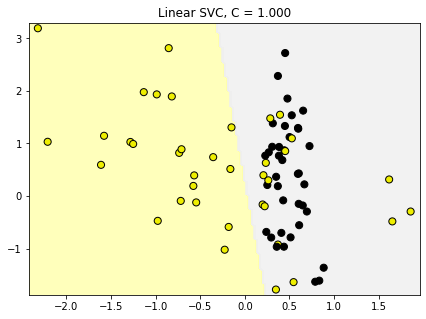

In [5]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

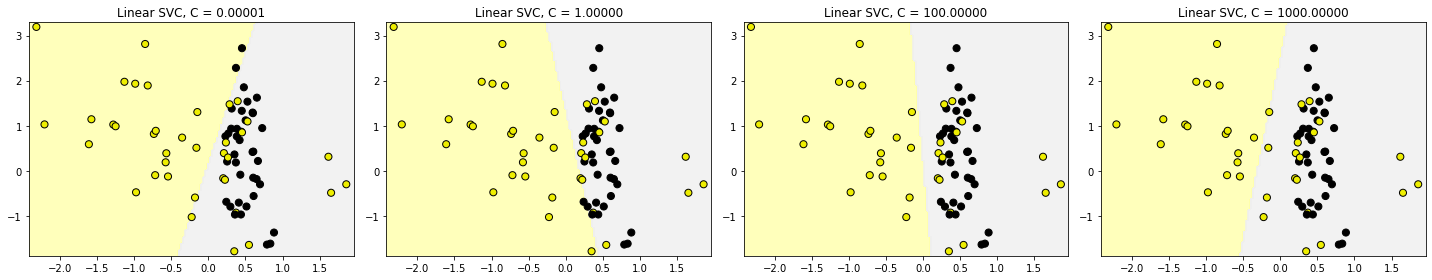

In [6]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 4, figsize=(20, 4))

for this_C, subplot in zip([0.00001, 1, 100, 1000], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

### SVM with kernels

#### Radial basis function (RBF) kernel

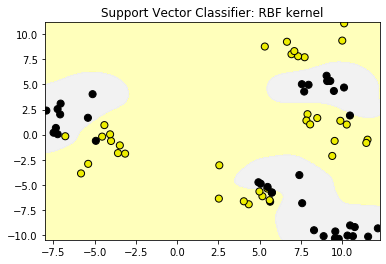

In [7]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# Fit a SVC with radial basis function (RBF) kernel
svm_rbf = SVC(kernel='rbf').fit(X_train, y_train)
plot_class_regions_for_classifier(svm_rbf,
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

#### (Exercise) Polynomial kernel

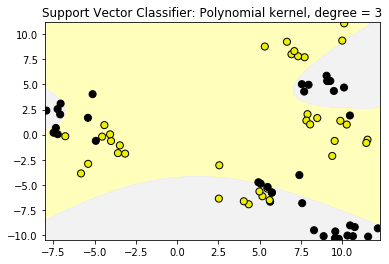

In [9]:
# %%% Your code: fit a SVC with polynomial kernel, degree = 3
svm_poly3 = SVC(kernel='poly', degree=3).fit(X_train, y_train)
plot_class_regions_for_classifier(svm_poly3, X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

#### Support Vector Machine with RBF kernel: gamma parameter

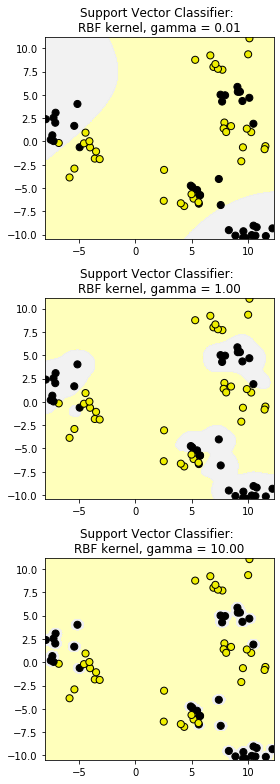

In [16]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

#### (Question) Can you tell with which gamma the model is underfitting and with which gamma the model is overfitting?

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel='rbf', gamma=this_gamma).fit(X_train, y_train)
    print('Gamma: {}'.format(this_gamma))
    print('Training accuracy: {}'.format(clf.score(X_train, y_train)))
    print('Test accuracy: {}'.format(clf.score(X_test, y_test)))

Gamma: 0.01
Training accuracy: 0.7466666666666667
Test accuracy: 0.68
Gamma: 1.0
Training accuracy: 0.9466666666666667
Test accuracy: 0.72
Gamma: 10.0
Training accuracy: 0.9866666666666667
Test accuracy: 0.6


#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

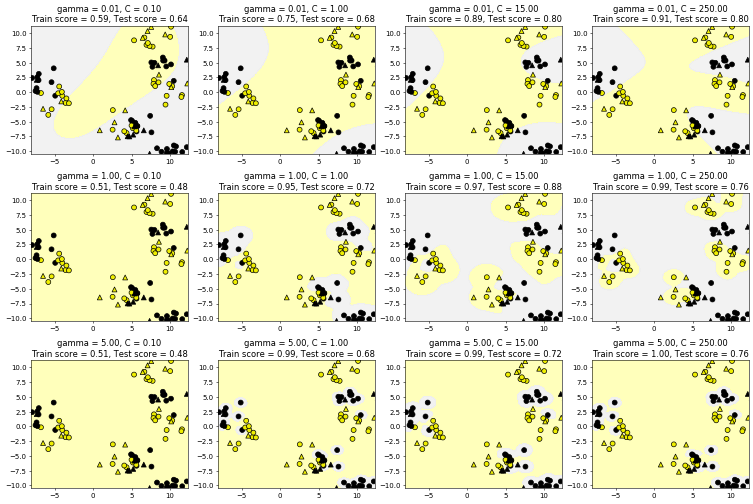

In [13]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Application of SVMs to a real dataset: unnormalized data

In [18]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


### (Exercise) Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

# %%% Your code: preprocess the feature using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


## Data Leakage

### (Question) What's wrong with the following model selection procedure? 
Hint: there are two mistakes causing data leakage.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

param_range = 10**np.linspace(-3, 3, 30)

scaler = MinMaxScaler()
X_cancer_scaled = scaler.fit_transform(X_cancer)

scores = {}
for this_kernel in ['linear', 'rbf']:
    for this_gamma in 10**np.linspace(-2, 2, 5):
        for this_C in 10**np.linspace(-2, 2, 5):
            clf = SVC(kernel=this_kernel, gamma=this_gamma, C=this_C)
            scores[(this_kernel, this_gamma, this_C)] = np.mean(cross_val_score(clf, X_cancer_scaled, y_cancer, cv=5))
    
best_kernel, best_gamma, best_C = max(scores.items(), key=operator.itemgetter(1))[0]
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_cancer_scaled, y_cancer, random_state=0, test_size=0.2)
clf = SVC(kernel=best_kernel, gamma=best_gamma, C=best_C).fit(X_train_scaled, y_train)

print('Best kernel: {}'.format(best_kernel))
print('Best gamma: {}'.format(best_gamma))
print('Best C: {}'.format(best_C))
print('Training accuracy: {}'.format(clf.score(X_train_scaled, y_train)))
print('Test accuracy: {}'.format(clf.score(X_test_scaled, y_test)))
    


Best kernel: rbf
Best gamma: 1.0
Best C: 10.0
Training accuracy: 0.989010989010989
Test accuracy: 0.9824561403508771


#### (Exercise) Please correct the model selection method above

In [18]:
from sklearn.model_selection import cross_val_score

param_range = 10**np.linspace(-3, 3, 30)

# %%% Your code: correct model selection procedure
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state=0, test_size=0.2)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scores = {}
for this_kernel in ['linear', 'rbf']:
    for this_gamma in 10**np.linspace(-2, 2, 5):
        for this_C in 10**np.linspace(-2, 2, 5):
            clf = SVC(kernel=this_kernel, gamma=this_gamma, C=this_C)
            scores[(this_kernel, this_gamma, this_C)] = np.mean(cross_val_score(clf, X_train_scaled, y_train, cv=5))
    
best_kernel, best_gamma, best_C = max(scores.items(), key=operator.itemgetter(1))[0]
clf = SVC(kernel=best_kernel, gamma=best_gamma, C=best_C).fit(X_train_scaled, y_train)

print('Best kernel: {}'.format(best_kernel))
print('Best gamma: {}'.format(best_gamma))
print('Best C: {}'.format(best_C))
print('Training accuracy: {}'.format(clf.score(X_train_scaled, y_train)))
print('Test accuracy: {}'.format(clf.score(X_test_scaled, y_test)))
    


Best kernel: rbf
Best gamma: 1.0
Best C: 1.0
Training accuracy: 0.9846153846153847
Test accuracy: 0.9736842105263158


### Dummy classifiers with data leakage

If we tune the model on test data, we'll see even a dummy classifier with a tuned random seed can outperform the SVC classifier.

In [19]:
# produces uniformly random predictions
from sklearn.dummy import DummyClassifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

clf = SVC(kernel='linear', C=1.0).fit(X_train, y_train)
print('SVM test accuracy: {}'.format(clf.score(X_test, y_test)))

dummy = DummyClassifier(strategy='uniform', random_state=0).fit(X_train, y_train)
print('Dummy (with seed 0) test accuracy: {}'.format(dummy.score(X_test, y_test)))

scores = []
for i in range(1000):
    np.mean(cross_val_score(dummy, X_C2, y_C2))
    dummy = DummyClassifier(strategy='uniform', random_state=i).fit(X_train, y_train)
    scores.append(dummy.score(X_test, y_test))

dummy = DummyClassifier(strategy='uniform', random_state=np.argmax(scores)).fit(X_train, y_train)

print('Dummy (with a tuned seed) test accuracy: {}'.format(dummy.score(X_test, y_test)))

SVM test accuracy: 0.76
Dummy (with seed 0) test accuracy: 0.48
Dummy (with a tuned seed) test accuracy: 0.8


## Missing data imputation

In [20]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])  


X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))


[[4.   2.  ]
 [6.   3.67]
 [7.   6.  ]]


In [21]:
def get_results(dataset):
    rng = np.random.RandomState(0)

    X_full, y_full = dataset.data, dataset.target
    n_samples = X_full.shape[0]
    n_features = X_full.shape[1]

    # Add missing values in 75% of the lines
    missing_rate = 0.75
    n_missing_samples = int(np.floor(n_samples * missing_rate))
    missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
                                          dtype=np.bool),
                                 np.ones(n_missing_samples,
                                         dtype=np.bool)))
    rng.shuffle(missing_samples)
    missing_features = rng.randint(0, n_features, n_missing_samples)
    X_missing = X_full.copy()
    X_missing[np.where(missing_samples)[0], missing_features] = np.nan
    y_missing = y_full.copy()
    
    return X_full, y_full, X_missing, y_missing

dataset = load_breast_cancer()

X_full, y_full, X_missing, y_missing = get_results(dataset)

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, random_state=0)

clf = SVC(kernel='linear', C=10).fit(X_train, y_train)
print('Full dataset')
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Full dataset
Accuracy of Linear SVC on training set: 0.98
Accuracy of Linear SVC on test set: 0.97


### (Exercise) Use SimpleImputator with strategy='mean' to impute the missing data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_missing, y_missing, random_state=0)

# %%% Your code: impute the missing value using SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train)  
X_test = imp.transform(X_test)

clf = SVC(kernel='linear', C=10).fit(X_train, y_train)
print('Mean imputation')
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))


Mean imputation
Accuracy of Linear SVC on training set: 0.97
Accuracy of Linear SVC on test set: 0.97


### (Exercise) Use SimpleImputator with strategy='constant' and set the constant as 0 to impute the missing data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_missing, y_missing, random_state=0)

# %%% Your code: impute the missing value using SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_train = imp.fit_transform(X_train)  
X_test = imp.transform(X_test)

clf = SVC(kernel='linear', C=10).fit(X_train, y_train)
print('Zero imputation')
print('Accuracy of Linear SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Zero imputation
Accuracy of Linear SVC on training set: 0.96
Accuracy of Linear SVC on test set: 0.94


## (Optional) Open question: regularized logistic regression vs SVM on high dimensional data

In the open question of lab 1 and lab 3, we have explored how the data dimension influence the performance of KNN and logistic regression. In this question, you are asked to explore how different feature dimension affects SVM and logistic regression with different hyper-parameters. Specifically, please try different `C` for logitstic regression with `penalty='l1'` and `penalty='l2'` respectively. Please also try different `C` for `SVC` and `LinearSVC` with `penalty='l1'` and `penalty='l2'`.

Text(0, 0.5, 'Accuracy')

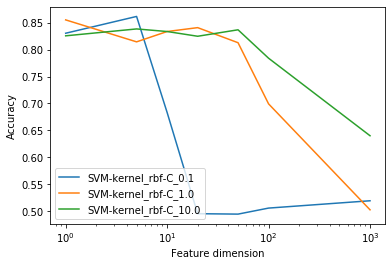

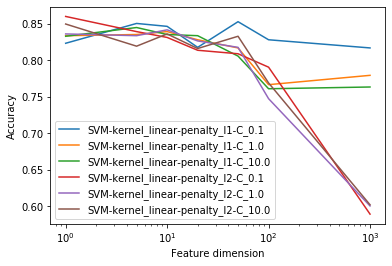

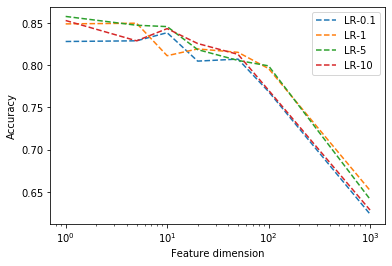

In [24]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# generate n synthetic data points from [0, 1]^d; label is positive if x_1 + noise > 0.5
RANDOM_STATE = np.random.RandomState(0)
def generate_data(n, d):
    X = RANDOM_STATE.uniform(size=(n, d))
    y = (X[:, 0] + RANDOM_STATE.normal(loc=0, scale=0.2, size=(n,)) > 0.5).astype(int)
    return X, y

n = 500

dimension_range = [1, 5, 10, 20, 50, 100, 1000]

# %%% Your code: design and implement experiments to explore how feature dimension affects k-NN with different k and LogisticRegression with different C
plt.figure()
    
this_kernel = 'rbf'
for this_C in 10**np.linspace(-1, 1, 3):
    svm = SVC(kernel=this_kernel, C=this_C)

    results = []
    for d in dimension_range:
        scores = []
        for i in range(10):
            X, y = generate_data(n, d)
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
            svm.fit(X_train, y_train)
            scores.append(svm.score(X_test, y_test))
        results.append(np.mean(scores))
    plt.semilogx(dimension_range, results, label='SVM-kernel_{}-C_{}'.format(this_kernel, this_C))

plt.legend()    
plt.xlabel('Feature dimension')
plt.ylabel('Accuracy')
        
plt.figure()
this_kernel = 'linear'
for this_penalty in ['l1', 'l2']:
    for this_C in 10**np.linspace(-1, 1, 3):
        svm = LinearSVC(penalty=this_penalty, C=this_C, dual=False)

        results = []
        for d in dimension_range:
            scores = []
            for i in range(10):
                X, y = generate_data(n, d)
                X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
                svm.fit(X_train, y_train)
                scores.append(svm.score(X_test, y_test))
            results.append(np.mean(scores))
        plt.semilogx(dimension_range, results, label='SVM-kernel_{}-penalty_{}-C_{}'.format(this_kernel, this_penalty, this_C))

plt.legend()    
plt.xlabel('Feature dimension')
plt.ylabel('Accuracy')

plt.figure()

for C in [0.1, 1, 5, 10]:
    model = LogisticRegression(C=C)

    results = []
    for d in dimension_range:
        scores = []
        for i in range(10):
            X, y = generate_data(n, d)
            X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))
        results.append(np.mean(scores))
    plt.semilogx(dimension_range, results, "--", label="LR-{}".format(C))

plt.legend()    
plt.xlabel('Feature dimension')
plt.ylabel('Accuracy')